<a href="https://colab.research.google.com/github/stanislavfort/hilbert-curves/blob/main/Generating_3D_Hilbert_curves.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Generating 3D Hilbert curves

## Imports

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

## Roll, Yaw and Pitch operators

In [2]:
def cross_product(a,b):
  return np.array([a[1]*b[2]-a[2]*b[1], a[2]*b[0]-a[0]*b[2], a[0]*b[1]-a[1]*b[0]])

def apply_roll(forward_vector, up_vector, amount):
  assert amount in [-1,1]
  return forward_vector, amount * cross_product(forward_vector,up_vector)

def apply_yaw(forward_vector, up_vector, amount):
  assert amount in [-1,1]
  return amount * cross_product(forward_vector,up_vector), up_vector

def apply_pitch(forward_vector, up_vector, amount):
  assert amount in [-1,1]
  return (-1)**(amount == -1)*up_vector, (-1)**(amount == 1)*forward_vector


## Drawing = Lindenmayer system string to line segments

In [3]:
def draw_3d_string(s):
  position = np.array([0,0,0])
  logged_positions = [position]

  forward_vector = np.array([1,0,0])
  up_vector = np.array([0,1,0])

  fn_dict = {
      ">": lambda x,y: apply_roll(x,y,+1),
      "<": lambda x,y: apply_roll(x,y,-1),
      "+": lambda x,y: apply_yaw(x,y,-1),
      "-": lambda x,y: apply_yaw(x,y,+1),
      "^": lambda x,y: apply_pitch(x,y,+1),
      "v": lambda x,y: apply_pitch(x,y,-1),
  }

  for c in s:
    if c in [">","<","^","v","+","-"]:
      forward_vector, up_vector = fn_dict[c](forward_vector, up_vector)
    elif c in ["F"]:
      position = position + forward_vector
      logged_positions.append(position)
    elif c in ["X"]:
      pass
    else:
      assert False

  return logged_positions

## L-system rule application

In [4]:
def apply_l_system_rules(input_string, rules):
    transformed = [rules.get(symbol, symbol) for symbol in input_string]
    return ''.join(transformed)

def iteratively_apply_l_system_rules(input_string, rules, N):
    for _ in range(N):
      input_string = apply_l_system_rules(input_string, rules)
    return input_string

## 3D Hilbert curve

### Generating the curve

In [5]:
rules_3d_hilbert = {
    "X": "^<XF^<XFX-F^>>XFXvF+>>XFX-F>X->",
}

n = 3 # order of the Hilbert curve
s = iteratively_apply_l_system_rules("X",rules_3d_hilbert,n)

print(f"3D Hilbert curve of order={n}: {s}")

3D Hilbert curve of order=3: ^<^<^<XF^<XFX-F^>>XFXvF+>>XFX-F>X->F^<^<XF^<XFX-F^>>XFXvF+>>XFX-F>X->F^<XF^<XFX-F^>>XFXvF+>>XFX-F>X->-F^>>^<XF^<XFX-F^>>XFXvF+>>XFX-F>X->F^<XF^<XFX-F^>>XFXvF+>>XFX-F>X->vF+>>^<XF^<XFX-F^>>XFXvF+>>XFX-F>X->F^<XF^<XFX-F^>>XFXvF+>>XFX-F>X->-F>^<XF^<XFX-F^>>XFXvF+>>XFX-F>X->->F^<^<^<XF^<XFX-F^>>XFXvF+>>XFX-F>X->F^<^<XF^<XFX-F^>>XFXvF+>>XFX-F>X->F^<XF^<XFX-F^>>XFXvF+>>XFX-F>X->-F^>>^<XF^<XFX-F^>>XFXvF+>>XFX-F>X->F^<XF^<XFX-F^>>XFXvF+>>XFX-F>X->vF+>>^<XF^<XFX-F^>>XFXvF+>>XFX-F>X->F^<XF^<XFX-F^>>XFXvF+>>XFX-F>X->-F>^<XF^<XFX-F^>>XFXvF+>>XFX-F>X->->F^<^<XF^<XFX-F^>>XFXvF+>>XFX-F>X->F^<^<XF^<XFX-F^>>XFXvF+>>XFX-F>X->F^<XF^<XFX-F^>>XFXvF+>>XFX-F>X->-F^>>^<XF^<XFX-F^>>XFXvF+>>XFX-F>X->F^<XF^<XFX-F^>>XFXvF+>>XFX-F>X->vF+>>^<XF^<XFX-F^>>XFXvF+>>XFX-F>X->F^<XF^<XFX-F^>>XFXvF+>>XFX-F>X->-F>^<XF^<XFX-F^>>XFXvF+>>XFX-F>X->->-F^>>^<^<XF^<XFX-F^>>XFXvF+>>XFX-F>X->F^<^<XF^<XFX-F^>>XFXvF+>>XFX-F>X->F^<XF^<XFX-F^>>XFXvF+>>XFX-F>X->-F^>>^<XF^<XFX-F^>>XFXvF+>>XFX-F>X->F^<XF^<XFX-F

### Plotting

In [6]:
def plot_3d_string(s,title=""):

  points = np.stack(draw_3d_string(s), axis=0)

  # Extract x, y, and z coordinates
  xs = points[:, 0]
  ys = points[:, 1]
  zs = points[:, 2]

  # Set up a 3D plot
  fig = plt.figure()
  ax = fig.add_subplot(111, projection='3d')
  ax.set_title(title)

  # Plot the curve line segment by line segment
  for i in range(len(xs)-1):
    ax.plot([xs[i],xs[i+1]], [ys[i],ys[i+1]], [zs[i],zs[i+1]], color=plt.cm.brg(i/len(xs)))#,marker="o",markersize=5)

  ax.set_xticks([],[])
  ax.set_yticks([],[])
  ax.set_zticks([],[])

  plt.show()

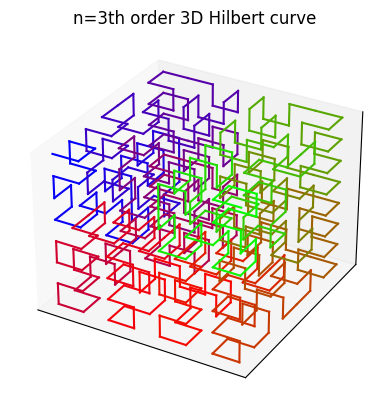

In [7]:
plot_3d_string(s,title=f"n={n}th order 3D Hilbert curve")

### Plotting a series of them

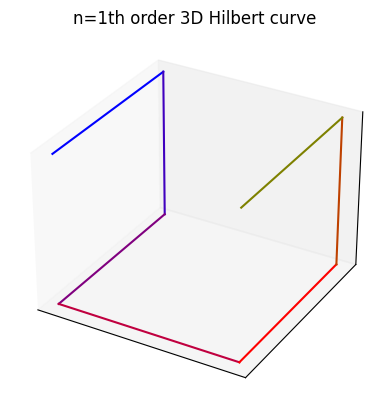

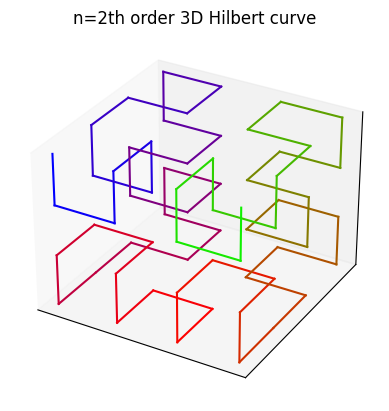

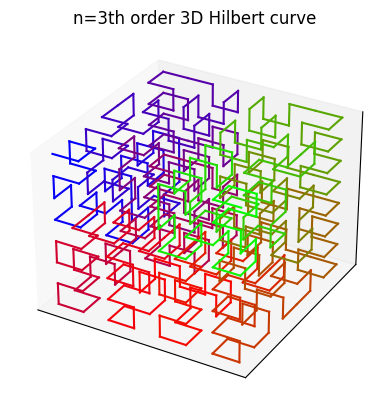

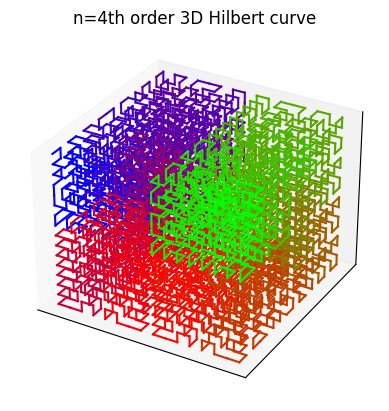

In [8]:
for n in range(1,5):
  s = iteratively_apply_l_system_rules("X",rules_3d_hilbert,n)
  plot_3d_string(s, title=f"n={n}th order 3D Hilbert curve")